In [159]:
import sys; print(sys.version)
import time; print(time.strftime("%c"))

import math as m
import numpy as np

from scipy.integrate import odeint
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interact, FloatSlider

style.use('classic')
%matplotlib inline

3.5.1 |Anaconda 2.4.1 (64-bit)| (default, Dec  7 2015, 11:16:01) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Tue Jan 26 15:14:29 2016


This is a summary for the chapter 4 of [R. Fitzpatrick, "Introduction to Computational Physics." 16-Jul-2009.](http://farside.ph.utexas.edu/teaching/329/329.html)

# 4. The Chaotic Pendulum

## 4.1 Introduction

The angular equation of motion of the drived pendulum, under the viscous dgrag, is
$$m l \frac{\mathrm{d}^2\theta}{\mathrm{d}~t^2} + \nu \frac{\mathrm{d}\theta}{\mathrm{d}t} + m g \sin \theta = A \cos \omega t$$
where $g$ is th downward acceleration due to gravity, $\nu$ is a positive constant parameterizing the viscosity of the medium. Also, $A$ and $\omega$ are constant amplitude and constant angular frequency of the external driving torque.

The equation is normalized by
$$
\omega_0 = \sqrt\frac{g}{l}, \\ 
\hat t = \omega_0 t, \\
\hat \omega = \frac{\omega}{\omega_0}, \\
Q = \frac{m g}{\omega_0 \nu}, \\
\hat{A} = \frac{A}{m g},
$$.

The eof becomes 
$$\frac{\mathrm{d}^2\theta}{\mathrm{d}~\hat t^2} + \frac{1}{Q} \nu \frac{\mathrm{d}\theta}{\mathrm{d}\hat t} + \sin \theta = \hat A \cos \hat \omega \hat t~.$$
From now on, the hats on normalzied quantities will be omitted.

This second-order O.D.E can be written as two copuled first-order O.D.E.s:
$$
\begin{align}
\frac{\mathrm d \theta}{\mathrm d t} & = v~, \\
\frac{\mathrm d v}{\mathrm d t} & = -\frac{v}{Q} - \sin \theta + A \cos \omega t~.
\end{align}
$$

## 4.2 Analytic Solution

In [20]:
def max_angular_disp(omega, Q=1/2):
    return 1 / np.sqrt((1 - omega**2)**2 + omega**2 / Q**2)

The analytically calculated maximum angular displacement of a linear, damped, periodically driven, pendulum as a funciton of driving frequency.

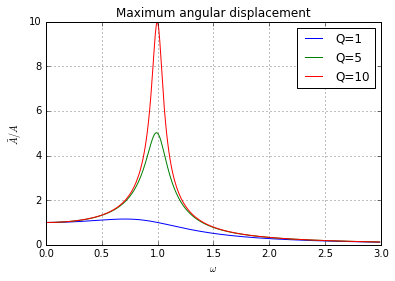

In [21]:
omega_fig23 = np.arange(0,3,0.01)

fig23 = plt.figure()
ax23 = fig23.add_subplot(1,1,1)

ax23.plot(omega, max_angular_disp(omega_fig23, Q=1), label='Q=1')
ax23.plot(omega, max_angular_disp(omega_fig23, Q=5), label='Q=5')
ax23.plot(omega, max_angular_disp(omega_fig23, Q=10), label='Q=10')
ax23.set_xlabel(r'$\omega$')
ax23.set_ylabel(r'$\tilde{A}/A$')
ax23.set_title(r'Maximum angular displacement')
ax23.grid(True)
ax23.legend()

In [16]:
class Pendulum:
    def __init__(self, theta0=0, v0=0, omega=0, Q=1/2):
        try:
            self.theta0 = float(theta0)
            self.v0 = float(v0)
            self.omega = float(omega)
            self.Q = float(Q)
        except TypeError(e):
            print(e)
            
    def theta(self, t):
        '''Return angle of the arm at the given time
        '''
        theta0 = self.theta0
        v0 = self.v0
        omega = self.omega
        Q = self.Q
        
        omega_Q = omega**2 + Q**2 * (omega**2 - 1)**2
        sqrt_Q = np.sqrt(1 - 1 / (2 * Q)**2)
        exp_cos = np.exp(-0.5 * t / Q) * np.cos(t * sqrt_Q)
        exp_sin = np.exp(-0.5 * t / Q) * np.sin(t * sqrt_Q) / (2 * sqrt_Q)

        ptclar = Q * (Q * (1 - omega**2) * np.cos(t * omega) + omega * np.sin(t * omega)) / omega_Q 
        homoge = (exp_cos * (Q**2 * (omega**2 - 1) / omega_Q + theta0) +
                  exp_sin * (- Q * (omega**2 + 1) / omega_Q + 2 * v0 + theta0 / Q))

        return ptclar + homoge

    def v(self, t):
        '''Return angular velocity of the bob at the given time
        '''
        theta0 = self.theta0
        v0 = self.v0
        omega = self.omega
        Q = self.Q
        
        omega_Q = omega**2 + Q**2 * (omega**2 - 1)**2
        sqrt_Q = np.sqrt(1 - 1 / (2 * Q)**2)
        exp_cos = np.exp(-0.5 * t / Q) * np.cos(t * sqrt_Q)
        exp_sin = np.exp(-0.5 * t / Q) * np.sin(t * sqrt_Q) / (2 * sqrt_Q)

        ptclar = Q * omega * (omega * np.cos(t * omega) + Q * (omega**2 - 1) * np.sin(t * omega)) / omega_Q 
        homoge = (exp_cos * (- Q * omega**2 / omega_Q + v0) +
                  exp_sin * ((omega**2 - 2 * Q**2 * (omega**2 - 1)) / omega_Q - v0 / Q - 2 * theta0))

        return ptclar + homoge

The analytically calculated phase-space trajectory of a linear, damped, periodically driven, pendulum for $Q=1$, $\omega=2$, $\theta(0)=0$, and $v(0)/A=0$.

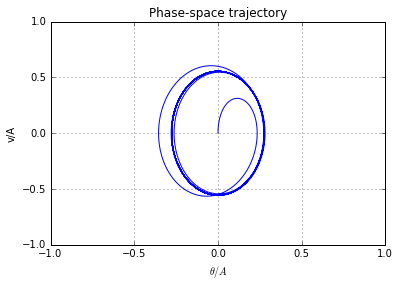

In [18]:
pen_fig24 = Pendulum(theta0=0, v0=0, omega=2, Q=1)

fig24 = plt.figure()
ax24 = fig24.add_subplot(1, 1, 1)

t_fig24 = np.arange(0,100,0.001)
ax24.plot(pen_fig24.theta(t_fig24), pen_fig24.v(t_fig24))
ax24.set_xlim([-1, 1])
ax24.set_ylim([-1, 1])
ax24.set_xlabel(r'$\theta/A$')
ax24.set_ylabel('v/A')
ax24.grid(True)
ax24.set_title("Phase-space trajectory")

The analytically calculated phase-space trajectory of a linear, damped, periodically driven, pendulum for $Q=1$, $\omega=2$, $\theta(0)=0.5$, and $v(0)/A=0.5$.

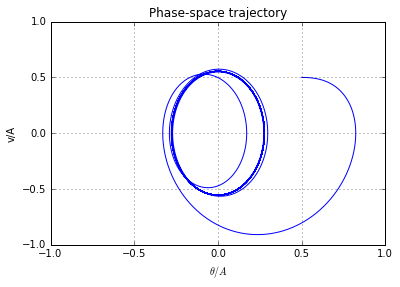

In [19]:
pen_fig25 = Pendulum(theta0=0.5, v0=0.5, omega=2, Q=1)

fig25 = plt.figure()
ax25 = fig25.add_subplot(1, 1, 1)

t_fig25 = np.arange(0,100,0.001)
ax25.plot(pen_fig25.theta(t_fig25), pen_fig25.v(t_fig25))
ax25.set_xlim([-1, 1])
ax25.set_ylim([-1, 1])
ax25.set_xlabel(r'$\theta/A$')
ax25.set_ylabel('v/A')
ax25.set_title("Phase-space trajectory")
ax25.grid(True)

## 4.3 Numerical Solution

In [24]:
def pend(w, t, p):
    """
    Defines the differential equations for the attenuated and driven pendulum.

    Arguments:
        w: vector of the state variables:
               w = [theta, v]
        t: time
        p: vector of the parameters:
               p = [Q, A, omega]
    """
    theta, v = w
    Q, A, omega = p

    dwdt = [v,
           -v / Q - m.sin(theta) + A * m.cos(omega * t)]
    return dwdt

In [25]:
# ODE solver parameters
abserr = 1e-8
relerr = 1e-6

## 4.4 Validation of Numerical Solutions

Without viscous damping and external driving, the normalized energy of the pendulum is expected to be constant.

In [33]:
t_fig26 = np.arange(0,10000)

# Pack up the parameters and initial conditions:
p_fig26 = [m.inf, 1/m.inf, 1] # [Q, A, omega]
w0_fig26 = [0, 1] # [theta0, v0]

wsol_fig26 = odeint(pend, w0_fig26, t_fig26, args=(p_fig26,), atol=abserr, rtol=relerr)

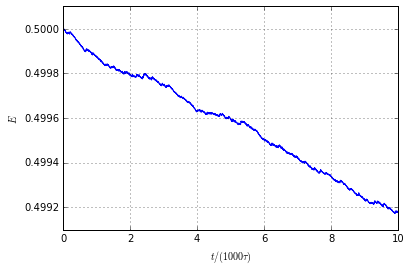

In [34]:
fig26 = plt.figure()
ax26 = fig26.add_subplot(1,1,1)
ax26.plot(t_fig26 / 1000, list(map(lambda w: 1 + w[1]**2 / 2 - m.cos(w[0]), wsol_fig26)))
ax26.set_xlabel(r'$t/(1000\tau)$')
ax26.set_ylabel('$E$')
ax26.grid(True)

When the equations are *linearized*, $R$ is expected to be constant, *after* all transients have died away.
$$R = \sqrt{\theta^2 + (v/\omega)^2}~.$$

In [38]:
# Pack up the parameters and initial conditions:
p_fig27 = [2, 1, 3] # [Q, A, omega]
w0_fig27 = [0, 0] # [theta0, v0]

t_fig27 = np.linspace(0, p_fig27[2]*1000, p_fig27[2]*1000)

wsol_fig27 = odeint(pend, w0_fig27, t_fig27, args=(p_fig27,), atol=abserr, rtol=relerr)

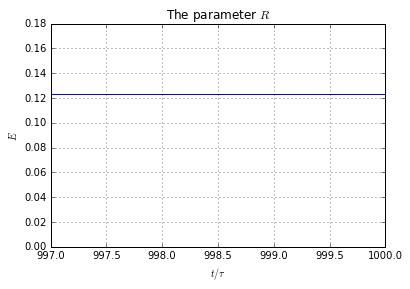

In [40]:
fig27 = plt.figure()
ax27 = fig27.add_subplot(1,1,1)
ax27.plot(t_fig27 / p_fig27[2], list(map(lambda w: m.sqrt(w[0]**2 + (w[1] / p_fig27[2])**2), wsol_fig27)))
ax27.set_xlabel(r'$t/\tau$')
ax27.set_ylabel('$E$')
ax27.set_xlim(997,1000)
ax27.set_title('The parameter $R$')
ax27.grid(True)

## 4.5 The Poincaré Section

Equally spaced points on a time-asymptotic orbit in phase-space means that corresponding orbits is in *period-1* motion.

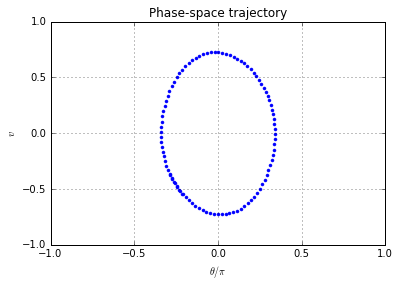

In [42]:
# Pack up the parameters and initial conditions:
p_fig28 = [1/2, 1.5, 2/3] # [Q, A, omega]
w0_fig28 = [0, 0] # [theta0, v0]

t_fig28 = np.linspace(0, 100, 1000)

wsol_fig28 = odeint(pend, w0, t_fig28, args=(p_fig28,), atol=abserr, rtol=relerr)

fig28 = plt.figure()
ax28 = fig28.add_subplot(1,1,1)
ax28.plot(wsol_fig28[-100:,0]/m.pi, wsol_fig28[-100:,1], '.')
ax28.set_xlabel(r'$\theta/\pi$')
ax28.set_ylabel(r'$v$')
ax28.set_title('Phase-space trajectory')
ax28.set_xlim(-1,1)
ax28.set_ylim(-1,1)
ax28.grid(True)

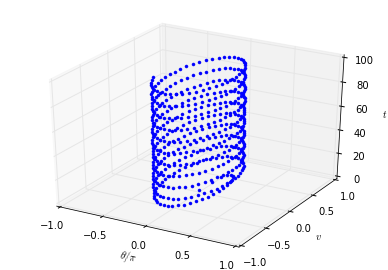

In [75]:
fig28_1 = plt.figure()
ax28_1 = fig28_1.add_subplot(111, projection='3d')
ax28_1.plot(wsol_fig28[::2,0]/m.pi, wsol_fig28[::2,1], t_fig28[::2], '.')
ax28_1.set_xlim(-1,1)
ax28_1.set_ylim(-1,1)
ax28_1.set_xlabel(r'$\theta/\pi$')
ax28_1.set_ylabel(r'$v$')
ax28_1.set_zlabel(r'$t$')
fig28_1.subplots_adjust(bottom=0.01, right=0.99)

The Poincaré section of a time-asymptotic orbit with $Q=0.5$, $A=1.5$, $\omega=2/3$, $\theta(0)=0$, $v(0)=0$, and $\phi=0$.

In [72]:
f_theta_fig29 = interp1d(t_fig28, wsol_fig28[:,0])
f_v_fig29 = interp1d(t_fig28, wsol_fig28[:,1])

phi = 0
t_fig29 = (phi + 2 * m.pi * np.arange(0,10)) / p_fig28[2]

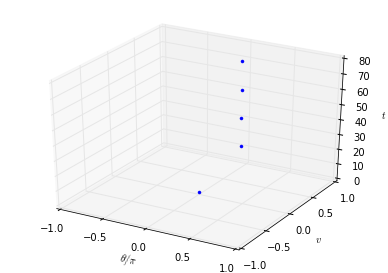

In [80]:
fig29_1 = plt.figure()
ax29_1 = fig29_1.add_subplot(111, projection='3d')
ax29_1.plot(f_theta_fig29(t_fig29[::2])/m.pi, f_v_fig29(t_fig29[::2]), t_fig29[::2], '.')
ax29_1.set_xlim(-1,1)
ax29_1.set_ylim(-1,1)
ax29_1.set_xlabel(r'$\theta/\pi$')
ax29_1.set_ylabel(r'$v$')
ax29_1.set_zlabel(r'$t$')
fig29_1.subplots_adjust(bottom=0.001, right=0.99)

The Poincaré section of a time-asymptotic orbit clearlys shows a *period-1* nature of the pendulum with $Q=0.5$, $A=1.5$, $\omega=2/3$, $\theta(0)=0$, $v(0)=0$, and $\phi=0$.

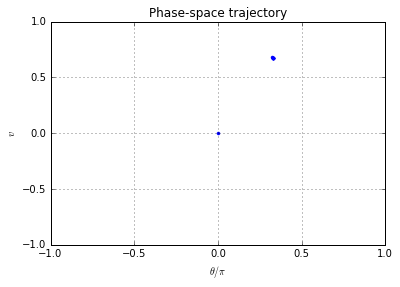

In [81]:
fig29 = plt.figure()
ax29 = fig29.add_subplot(1,1,1)
ax29.plot(f_theta_fig29(t_fig29), f_v_fig29(t_fig29), '.')
ax29.set_xlabel(r'$\theta/\pi$')
ax29.set_ylabel(r'$v$')
ax29.set_title('Phase-space trajectory')
ax29.set_xlim(-1,1)
ax29.set_ylim(-1,1)
ax29.grid(True)

## 4.6 Spatial Symmetry Breaking

In [203]:
class NonlinearPendulum:
    def __init__(self, theta0=0, v0=0, omega=0, Q=1/2, A=1, 
                 t=(0,100,100), abserr=1e-8, relerr=1e-6):
        self.theta0 = float(theta0)
        self.v0 = float(v0)
        
        self.omega = float(omega)
        self.Q = float(Q)
        self.A = float(A)
        self.t = np.linspace(*t)
        
        self.abserr = abserr
        self.relerr = relerr
        
        self.theta, self.v = None, None
    
    @staticmethod
    def eq(w, t, p):
        """
        Defines the differential equations for the attenuated and driven pendulum.

        Arguments:
            w: vector of the state variables:
                   w = [theta, v]
            t: time
            p: vector of the parameters:
                   p = [Q, A, omega]
        """
        theta, v = w
        Q, A, omega = p

        dwdt = [v,
               -v / Q - m.sin(theta) + A * m.cos(omega * t)]
        return dwdt
    
    def solve(self):
        sol = odeint(self.eq, [self.theta0, self.v0], self.t, 
                     args=((self.Q, self.A, self.omega),), 
                     atol=self.abserr, rtol=self.relerr)
        self.theta = interp1d(self.t, sol[:,0])
        self.v = interp1d(self.t, sol[:,1])

In [215]:
def get_v_fig30(Q):
    nlp = NonlinearPendulum(Q=Q, A=1.5, omega=2/3, theta0=0, v0=0,
                           t=(0,2*m.pi*100/(2/3),1000))
    nlp.solve()
    return nlp.v([2*m.pi*100/(2/3)])[0]

Q_fig30 = np.arange(1.2,1.3,0.005)
v_fig30 = [get_v_fig30(Q) for Q in Q_fig30]

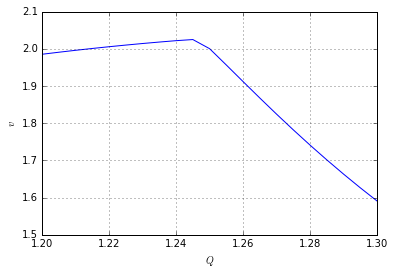

In [216]:
fig30 = plt.figure()
ax30 = fig30.add_subplot(1,1,1)
ax30.plot(Q_fig30, v_fig30)
ax30.set_xlim(1.2,1.3)
ax30.set_xlabel(r'$Q$')
ax30.set_ylabel(r'$v$')
ax30.grid(True)

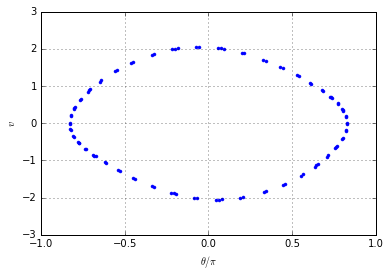

In [205]:
def gen_data_fig32(Q):
    nlp = NonlinearPendulum(Q=Q, A=1.5, omega=2/3, theta0=0, v0=0,
                           t=(0,1000,10000))
    nlp.solve()
    return (nlp.theta(np.arange(nlp.t[0],nlp.t[-1],1/nlp.omega)), 
            nlp.v(np.arange(nlp.t[0],nlp.t[-1],1/nlp.omega)))

def draw_orbit_fig32(Q):
    x, y = gen_data_fig32(Q)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x[-100:]/m.pi, y[-100:], '.')
    ax.set_xlim(-1,1)
    ax.set_ylim(-3,3)
    ax.set_xlabel(r'$\theta/\pi$')
    ax.set_ylabel(r'$v$')
    ax.grid(True)
    
interact(draw_orbit_fig32, Q=FloatSlider(min=1.24, max=1.30, step=0.01, continuous_update=False));

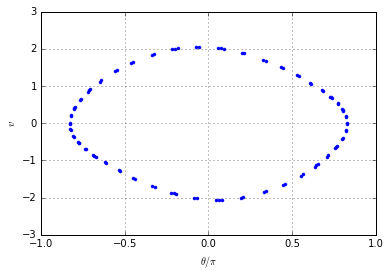

In [212]:
def gen_data_fig33(Q_in):
    nlp = NonlinearPendulum(Q=Q_in, A=1.5, omega=2/3, theta0=0, v0=-3,
                           t=(0,1000,10000))
    nlp.solve()
    return (nlp.theta(np.arange(nlp.t[0],nlp.t[-1],1/nlp.omega)), 
            nlp.v(np.arange(nlp.t[0],nlp.t[-1],1/nlp.omega)))

def draw_orbit_fig33(Q):
    x, y = gen_data_fig33(Q)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x[-100:]/m.pi, y[-100:], '.')
    ax.set_xlim(-1,1)
    ax.set_ylim(-3,3)
    ax.set_xlabel(r'$\theta/\pi$')
    ax.set_ylabel(r'$v$')
    ax.grid(True)
    
interact(draw_orbit_fig33, Q=FloatSlider(min=1.24, max=1.30, step=0.01, continuous_update=False));

In [213]:
def get_v_fig34(Q, v0):
    nlp = NonlinearPendulum(Q=Q, A=1.5, omega=2/3, theta0=0, v0=v0,
                           t=(0,2*m.pi*100/(2/3),10000))
    nlp.solve()
    return nlp.v([2*m.pi*100/(2/3)])[0]

Q_fig34 = np.arange(1.2,1.3,0.005)
v1_fig34 = [get_v_fig34(Q, 0) for Q in Q_fig34]
v2_fig34 = [get_v_fig34(Q, -3) for Q in Q_fig30]

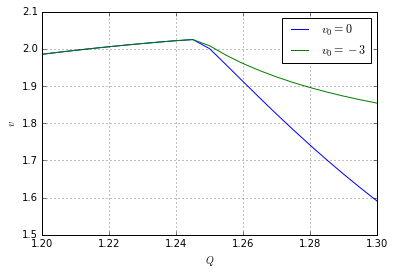

In [214]:
fig34 = plt.figure()
ax34 = fig34.add_subplot(1,1,1)
ax34.plot(Q_fig34, v1_fig34, label=r'$v_0=0$')
ax34.plot(Q_fig34, v2_fig34, label=r'$v_0=-3$')
ax34.set_xlim(1.2,1.3)
ax34.set_xlabel(r'$Q$')
ax34.set_ylabel(r'$v$')
ax34.grid(True)
ax34.legend()

## 4.7 Basins of Attraction

In [306]:
def get_v_fig35(th0, v0):
    nlp = NonlinearPendulum(Q=1.3, A=1.5, omega=2/3, theta0=th0, v0=v0,
                           t=(0,2*m.pi*100/(2/3),10000))
    nlp.solve()
    return nlp.v([2*m.pi*100/(2/3)])[0]

v_get_v_fig35 = np.vectorize(get_v_fig35)

th0, v0 = np.meshgrid(np.linspace(-m.pi, m.pi, 20), np.linspace(-3, 3, 20))

v = v_get_v_fig35(th0, v0)

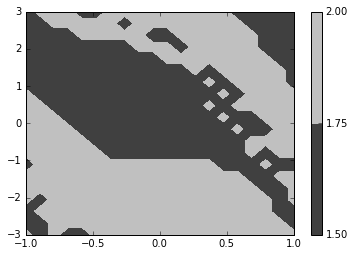

In [311]:
fig35 = plt.figure()
ax35 = fig35.add_subplot(1,1,1)
cs35 = ax35.contourf(th0/m.pi, v0, v, 1, cmap=plt.cm.gray, origin='lower')
plt.colorbar(cs35)

## 4.8 Period-Doubling bifurcations

## 4.9 The Route to Chaos

## 4.10 Sensitivity to Initial Conditions

## 4.11 The Definition of Chaos

## 4.12  Periodic Windows

## 4.13 Further Investigation